In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from astropy import units as u

In [41]:
def radius_to_circumference(radius_rsun):
    radius_rsun *= u.R_sun
    radius_km = radius_rsun.to(u.km)
    return 2*np.pi*radius_km
    
def period_and_circ_to_velocity(period_days, circumference):
    period_days *= u.day
    period_s = period_days.to(u.s)
    velocity = circumference/period_s # km/s
    return velocity
    
def vsini_to_inclination(vsini, velocity):
    velocity *= u.km/u.s
    vsini *= u.km/u.s
    sini = vsini/velocity
    inc = np.arcsin(sini)
    return inc.to(u.deg)

# tests
rsun = 1
circ = radius_to_circumference(rsun)
print("Circumference = ", circ)
velocity = period_and_circ_to_velocity(26, circ)
print("Velocity = ", velocity)
inclination = vsini_to_inclination(velocity*np.sin(.5), velocity)
print("inclination = ", inclination)

Circumference =  4371212.018204838 km
Velocity =  1.9458742958532933 km / s
inclination =  28.64788975654116 deg


In [8]:
act = pd.read_csv("../data/vsini-result.csv")
act.keys()

Index(['source_id', 'vsini_esphs', 'vsini_esphs_uncertainty', 'radius_flame',
       'radius_flame_upper', 'radius_flame_lower'],
      dtype='object')

In [4]:
lu_kepler = pd.read_csv("../../data/lu_kinematic_ages.csv", skiprows=72)
full_kepler = pd.read_csv("../../data/kepler_edr3_1arcsec.csv")
mc = pd.read_csv("../../data/Table_1_Periodic.txt")

kepler1 = pd.merge(lu_kepler, full_kepler, how="left", left_on="KIC", right_on="kepid")
kepler = pd.merge(kepler1, mc, how="left", on="kepid", suffixes=["", "_mcquillan"])
print(np.shape(lu_kepler), np.shape(full_kepler), np.shape(kepler))

(29949, 20) (198451, 134) (30184, 164)


In [6]:
df = pd.merge(act, kepler, on="source_id")

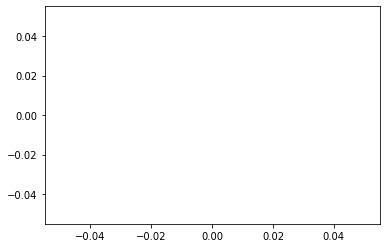

In [7]:
plt.plot(df.Prot, df.best_rotation_period, ".")